# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

0.4556114222690675
2.67253450690138 0.45204635808357463
2.676535307061412 0.44847405827203896
2.680536107221444 0.44489458001405074
2.684536907381476 0.44130798060410126
2.6885377075415082 0.4377143174506656
2.6925385077015402 0.4341136480752838
2.6965393078615723 0.43050603011164024
2.7005401080216043 0.426891521304641
2.7045409081816363 0.4232701795094896
2.7085417083416683 0.419642062690761
2.7125425085017003 0.4160072289214737
2.7165433086617323 0.4123657363821604
2.7205441088217643 0.4087176433599365
2.7245449089817964 0.4050630082475672
2.7285457091418284 0.4014018895425331
2.7325465093018604 0.39773434584609335
2.7365473094618924 0.3940604358623482
2.7405481096219244 0.39038021839729903
2.7445489097819564 0.38669375235790715
2.7485497099419884 0.3830010967511509
2.7525505101020205 0.37930231068308135
2.7565513102620525 0.3755974533578758
2.7605521104220845 0.3718865840768907
2.7645529105821165 0.3681697622377119
2.7685537107421485 0.3644470473332044
2.7725545109021805 0.36071849

5.417083416683337 -0.7618095318190142
5.421084216843369 -0.7592117191680935
5.425085017003401 -0.7566017542854625
5.429085817163433 -0.7539796789472124
5.433086617323465 -0.751345535123279
5.437087417483497 -0.7486993649767706
5.441088217643529 -0.7460412108632939
5.445089017803561 -0.7433711153302751
5.449089817963593 -0.7406891211162795
5.453090618123625 -0.7379952711503271
5.457091418283657 -0.7352896085512058
5.461092218443689 -0.7325721766267808
5.465093018603721 -0.7298430188733015
5.469093818763753 -0.7271021789747059
5.473094618923785 -0.7243497008019201
5.477095419083817 -0.7215856284121575
5.481096219243849 -0.7188100060482124
5.485097019403881 -0.7160228781377531
5.489097819563913 -0.7132242892926094
5.493098619723945 -0.7104142843080594
5.497099419883977 -0.7075929081621123
5.501100220044009 -0.7047602060147884
5.505101020204041 -0.7019162232073964
5.509101820364073 -0.6990610052618075
5.513102620524105 -0.6961945978797266
5.517103420684137 -0.6933170469419611
5.52110422084

 0.9048891528525435
8.297659531906382 0.9031789856233208
8.301660332066414 0.9014543617675312
8.305661132226446 0.8997153088901606
8.309661932386478 0.8979618548271512
8.31366273254651 0.8961940276449558
8.317663532706542 0.8944118556400894
8.321664332866574 0.8926153673386752
8.325665133026606 0.8908045914959887
8.329665933186638 0.888979557095997
8.33366673334667 0.8871402933508954
8.337667533506702 0.8852868297006393
8.341668333666734 0.8834191958124734
8.345669133826766 0.8815374215804563
8.349669933986798 0.8796415371249827
8.35367073414683 0.8777315727923005
8.357671534306862 0.8758075591540257
8.361672334466894 0.8738695270066531
8.365673134626926 0.8719175073710624
8.369673934786958 0.8699515314920232
8.37367473494699 0.8679716308376932
8.377675535107022 0.865977837099116
8.381676335267054 0.8639701821897129
8.385677135427086 0.8619486982447725
8.389677935587118 0.859913417620936
8.39367873574715 0.8578643728956797
8.397679535907182 0.8558015968667934
8.401680336067214 0.853725

10.94618923784757 -0.9987808062517145
10.950190038007602 -0.9989703117042907
10.954190838167634 -0.9991438272578795
10.958191638327666 -0.999301350135125
10.962192438487698 -0.999442877814656
10.96619323864773 -0.9995684080311266
10.970194038807762 -0.9996779387752524
10.974194838967794 -0.9997714682938424
10.978195639127826 -0.9998489950898279
10.982196439287858 -0.9999105179222855
10.98619723944789 -0.999956035806457
10.990198039607922 -0.999985548013766
10.994198839767954 -0.9999990540718289
10.998199639927986 -0.9999965537644626
11.002200440088018 -0.9999780471316879
11.00620124024805 -0.9999435344697291
11.010202040408082 -0.9998930163310089
11.014202840568114 -0.99982649352414
11.018203640728146 -0.9997439671139116
11.022204440888178 -0.9996454384212728
11.02620524104821 -0.9995309090233117
11.030206041208242 -0.9994003807532289
11.034206841368274 -0.99925385570031
11.038207641528306 -0.9990913362098905
11.042208441688338 -0.9989128248833195
11.04620924184837 -0.998718324577917
1


13.774754950990198 0.9350444201356135
13.77875575115023 0.9364553390156988
13.782756551310262 0.9378512686352408
13.786757351470294 0.9392321866504588
13.790758151630326 0.9405980709578537
13.794758951790358 0.9419488996945613
13.79875975195039 0.9432846512387028
13.802760552110422 0.9446053042097305
13.806761352270454 0.9459108374687707
13.810762152430486 0.9472012301189608
13.814762952590518 0.9484764615057851
13.81876375275055 0.9497365112174049
13.822764552910582 0.9509813590849847
13.826765353070614 0.952210985183016
13.830766153230647 0.9534253698296353
13.834766953390679 0.95462449358694
13.83876775355071 0.9558083372612988
13.842768553710743 0.9569768819036593
13.846769353870775 0.9581301088098512
13.850770154030807 0.9592679995208858
13.854770954190839 0.9603905358232513
13.85877175435087 0.9614976997492045
13.862772554510903 0.9625894735770584
13.866773354670935 0.9636658398314653
13.870774154830967 0.9647267812836974
13.874774954990999 0.965772280951922
13.87877575515103 0.

-0.7056463945634164
16.495299059811963 -0.7084755631747588
16.499299859971995 -0.7112933916566124
16.503300660132027 -0.7140998349057421
16.50730146029206 -0.7168948480011493
16.51130226045209 -0.7196783862047906
16.515303060612123 -0.7224504049622943
16.519303860772155 -0.7252108599036731
16.523304660932187 -0.7279597068440345
16.52730546109222 -0.7306969017842887
16.53130626125225 -0.7334224009118514
16.535307061412283 -0.7361361606013466
16.539307861572315 -0.7388381374153037
16.543308661732347 -0.7415282881048536
16.54730946189238 -0.7442065696104206
16.55131026205241 -0.7468729390624116
16.555311062212443 -0.7495273537819025
16.559311862372475 -0.7521697712813211
16.563312662532507 -0.7548001492651272
16.56731346269254 -0.7574184456304897
16.57131426285257 -0.7600246184679607
16.575315063012603 -0.7626186260621458
16.579315863172635 -0.7652004268923723
16.583316663332667 -0.7677699796333536
16.5873174634927 -0.7703272431558505
16.59131826365273 -0.77287217652733
16.595319063812763

0.47090119903531097
19.34386877375475 0.47442687062123723
19.34786957391478 0.4779449483501196
19.351870374074814 0.4814553759102671
19.355871174234846 0.48495809711244026
19.359871974394878 0.4884530558907505
19.36387277455491 0.4919401963035575
19.36787357471494 0.49541946253436475
19.371874374874974 0.4988907988927128
19.375875175035006 0.5023541498150709
19.379875975195038 0.505809459865726
19.38387677535507 0.5092566737376706
19.387877575515102 0.5126957362534874
19.391878375675134 0.5161265923662332
19.395879175835166 0.5195491871603191
19.399879975995198 0.5229634658523904
19.40388077615523 0.526369373792203
19.407881576315262 0.5297668564634983
19.411882376475294 0.5331558594848756
19.415883176635326 0.5365363286106628
19.419883976795358 0.5399082097317845
19.42388477695539 0.5432714488766285
19.427885577115422 0.5466259922119087
19.431886377275454 0.5499717860435281
19.435887177435486 0.5533087768174373
19.439887977595518 0.556636911120492
19.44388877775555 0.5599561356813078


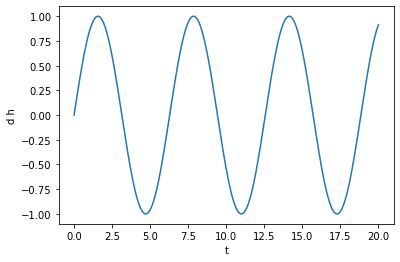

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

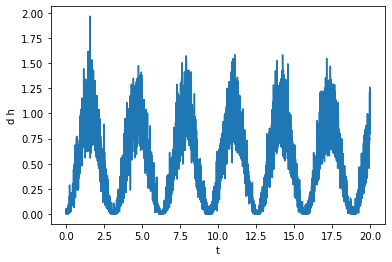

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

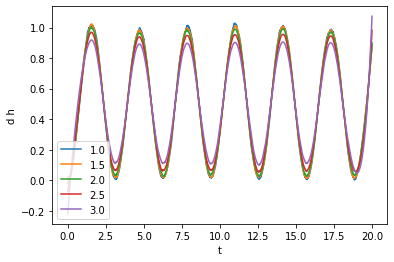

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

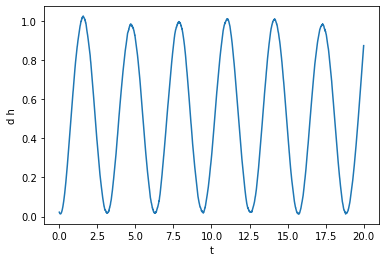

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1668


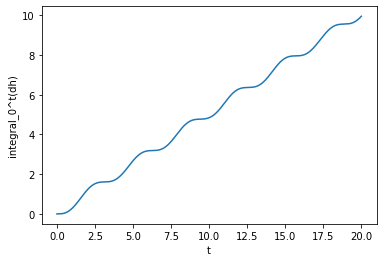

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

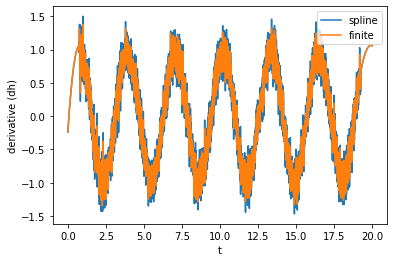

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

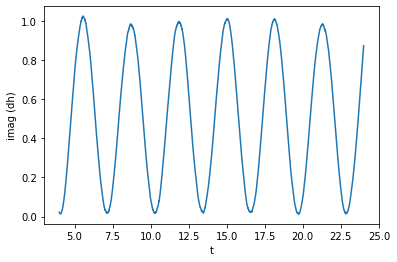

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

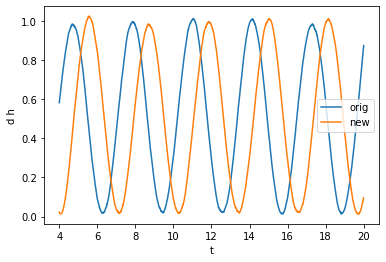

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

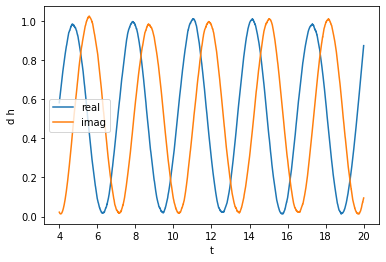

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

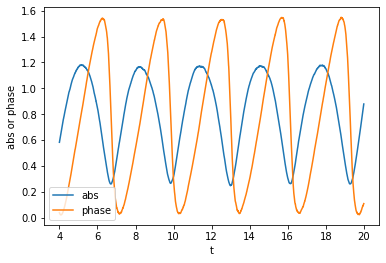

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

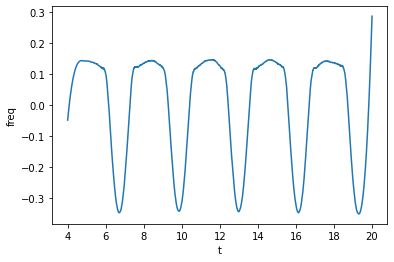

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

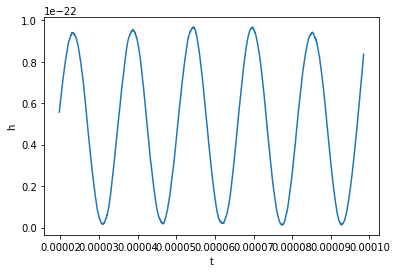

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

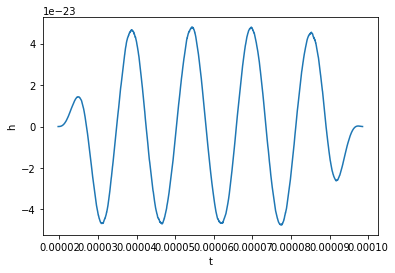

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

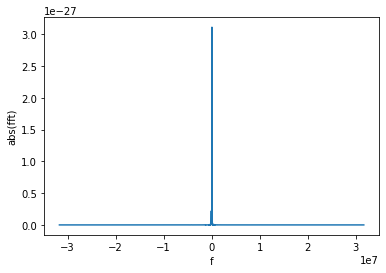

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

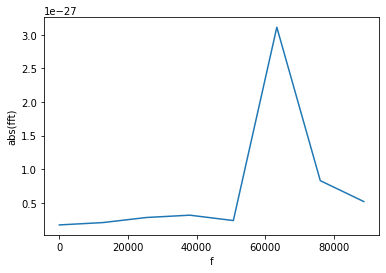

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64161.70


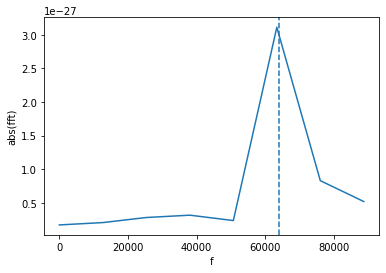

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.112e-27
Maximum with mask 8.293e-28
Length with mask 8
Length after having removed the masked points 7
